## Important Notes

- Normalization 255.0 :

Υπάρχουν αρκετοί λόγοι γιατί χρησιμοποιείτεαι κανονικοποιήση . Από τους κυριότερους είναι ότι χρησιμοποιούμε MLP μοντέλο που στο κομμάτι της Gradient Descent Optimization , τα νευρωνικά δίκτυα χρησιμοποιούν την κάθοδο κλίσης για να μάθουν. Όταν τα χαρακτηριστικά έχουν πολύ διαφορετικές κλίμακες, μπορεί να δημιουργηθεί μια "απότομη" επιφάνεια σφάλματος, καθιστώντας δυσκολότερη τη σύγκλιση του αλγορίθμου σε μια βέλτιστη λύση. Η κανονικοποίηση βοηθά στην εξομάλυνση της επιφάνειας σφάλματος, οδηγώντας σε ταχύτερη και σταθερότερη μάθηση.

Επίσης για το μοντέλο SVM που ανήκοει στους αλγορίθμους βασισμένοι στην απόσταση βασίζονται σε υπολογισμούς απόστασης. Εάν ένα χαρακτηριστικό έχει πολύ μεγαλύτερο εύρος, θα κυριαρχήσει στον υπολογισμό της απόστασης, διαστρεβλώνοντας τις πραγματικές σχέσεις μεταξύ των σημείων δεδομένων. Η κανονικοποίηση εξασφαλίζει ότι όλα τα χαρακτηριστικά συμβάλλουν εξίσου στους υπολογισμούς απόστασης.

Ο κύριος λόγος είναι να διασφαλιστεί ότι η κατεύθυνση του διανύσματος του δείγματος είναι πιο σημαντική από το μέγεθός του.

Υπολογίζεται από τον τύπο : Normalized Value = (Original Value - Minimum Value) / (Maximum Value - Minimum Value) , δηλαδή σαν παράδειγμα :για RGB1_R με τιμή 229.  
 RGB1_R = (229 - 0) / (255 - 0) = 0.898

- StandardScale() :

Η τυποποίηση μετατρέπει τα δεδομένα σας έτσι ώστε να έχουν μέση τιμή 0 και τυπική απόκλιση 1. Αυτό επιτυγχάνεται αφαιρώντας τον μέσο όρο του χαρακτηριστικού από κάθε τιμή και στη συνέχεια διαιρώντας με την τυπική απόκλιση.

Μαθηματικό τύπο : X' = (X - μ) / σ , όπου X: Η αρχική τιμή του χαρακτηριστικού , μ: Ο μέσος όρος (mean) όλων των τιμών του χαρακτηριστικού , σ: Η τυπική απόκλιση (standard deviation) όλων των τιμών του χαρακτηριστικού και X': Η τυποποιημένη τιμή του χαρακτηριστικού.

- Απαιτείται από αλγορίθμους που υποθέτουν τυποποιημένα δεδομένα (π.χ., SVM, ορισμένα νευρωνικά δίκτυα).
- Αποτρέπει χαρακτηριστικά με μεγαλύτερη κλίμακα να κυριαρχήσουν στην εκπαίδευση του μοντέλου.
- Κάνει το μοντέλο λιγότερο ευαίσθητο σε ακραίες τιμές.


### Version 1 : Simplier and adds model fit analysis to detect overfitting or underfitting.


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn

MLP Cross-Validation Results:
Accuracy: 0.4625 (+/- 0.0289)
Log-loss: 4.6808 (+/- 0.5360)
F1-score: 0.4398 (+/- 0.0315)

SVM Cross-Validation Results:
Accuracy: 0.2248 (+/- 0.0292)
Log-loss: 3.5097 (+/- 0.0353)
F1-score: 0.1885 (+/- 0.0340)



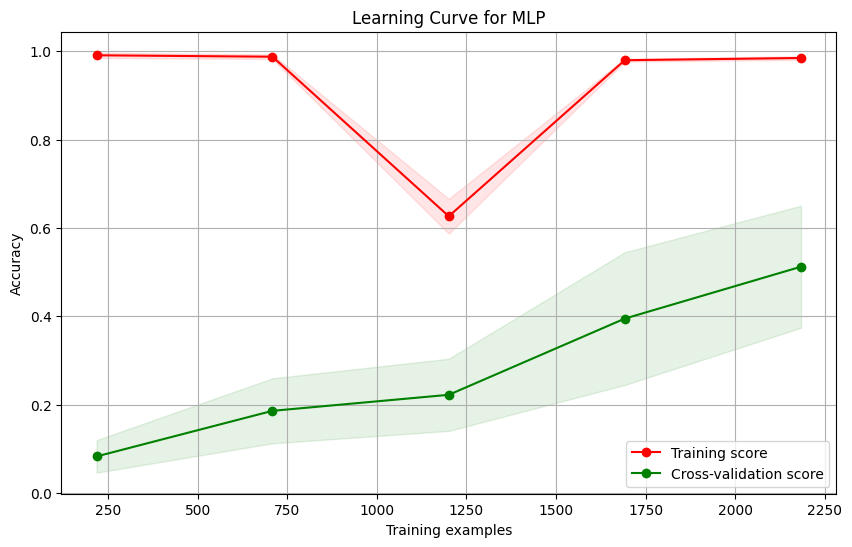


Analysis for MLP:
Final training score: 0.9847
Final validation score: 0.5121
The MLP shows signs of overfitting.
The training score is significantly higher than the validation score.
Consider using regularization techniques or reducing model complexity.


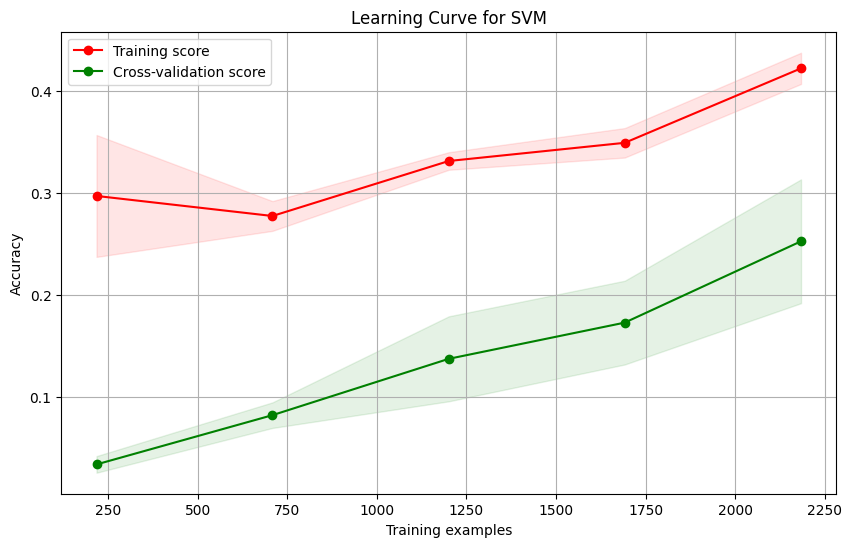


Analysis for SVM:
Final training score: 0.4225
Final validation score: 0.2527
The SVM shows signs of overfitting.
The training score is significantly higher than the validation score.
Consider using regularization techniques or reducing model complexity.

Model Selection:
MLP has higher accuracy, but shows signs of overfitting or underfitting.
Consider tuning the MLP model before selecting it.

No model selected due to overfitting/underfitting concerns.
Please tune the models and re-evaluate.


In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split, cross_validate, learning_curve  # For model evaluation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.neural_network import MLPClassifier  # For Multi-Layer Perceptron classifier
from sklearn.svm import SVC  # For Support Vector Machine classifier
from sklearn.pipeline import make_pipeline  # For creating a pipeline of transformations
from sklearn.metrics import accuracy_score, log_loss, f1_score  # For model evaluation metrics

# Load and preprocess the data 
data = pd.read_csv('final_dataset.csv')  # Read the CSV file
X = data.iloc[:, :-1].values / 255.0  # Extract features and normalize to [0, 1] range
y = data.iloc[:, -1].values  # Extract target variable

# Split the data into training and test sets
# use stratification (stratify=y) to ensure that the class distribution is maintained in both sets, which is crucial for imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to perform cross-validation
def perform_cv(model, X, y, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=5, return_estimator=True)
    return scores

# Function to print cross-validation results (accuracy, log-loss, and F1-score) for a given model 
def print_cv_results(model_name, scores):
    print(f"{model_name} Cross-Validation Results:")
    # υπολογίζει τη μέση ακρίβεια από όλες τις επαναλήψεις της crorss-validation folds , και εμφανίζει επίσης ένα διάστημα εμπιστοσύνης 95%, το οποίο μας δείχνει πόσο 
    # πιθανό είναι η πραγματική ακρίβεια να βρίσκεται εντός αυτού του εύρους.
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} (+/- {scores['test_accuracy'].std() * 2:.4f})")
    # long-loss : μετρά πόσο "εκτός" είναι οι προβλέψεις μας από τις πραγματικές τιμές. Όσο χαμηλότερη είναι η τιμή log-loss, τόσο καλύτερη είναι η απόδοση του μοντέλου. 
    # Και πάλι, ο κώδικας υπολογίζει τον μέσο όρο και το διάστημα εμπιστοσύνης 95% για να μας δώσει μια πιο ολοκληρωμένη εικόνα.
    print(f"Log-loss: {-scores['test_neg_log_loss'].mean():.4f} (+/- {scores['test_neg_log_loss'].std() * 2:.4f})")
    #F1-score: είναι ένας συνδυασμός της precision (πόσο ακριβείς είναι οι θετικές προβλέψεις μας) και της recall (πόσες από τις πραγματικές θετικές περιπτώσεις εντοπίσαμε). 
    # Το F1-score είναι ιδιαίτερα χρήσιμο όταν έχουμε ανισορροπημένα σύνολα δεδομένων.  Ο κώδικας υπολογίζει τον "weighted" F1-score, ο οποίος λαμβάνει υπόψη τη συχνότητα κάθε 
    # κατηγορίας στις προβλέψεις. Και πάλι, υπολογίζονται ο μέσος όρος και το διάστημα εμπιστοσύνης.
    print(f"F1-score: {scores['test_f1_weighted'].mean():.4f} (+/- {scores['test_f1_weighted'].std() * 2:.4f})")
    print()
    
def plot_learning_curve(model, X, y, title):
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    
    return plt, train_scores_mean, test_scores_mean

def analyze_model_fit(train_scores, test_scores, model_name):
    print(f"\nAnalysis for {model_name}:")
    print(f"Final training score: {train_scores[-1]:.4f}")
    print(f"Final validation score: {test_scores[-1]:.4f}")
    
    if train_scores[-1] - test_scores[-1] > 0.1:
        print(f"The {model_name} shows signs of overfitting.")
        print("The training score is significantly higher than the validation score.")
        print("Consider using regularization techniques or reducing model complexity.")
    elif train_scores[-1] < 0.8 and test_scores[-1] < 0.8:
        print(f"The {model_name} shows signs of underfitting.")
        print("Both training and validation scores are low.")
        print("Consider increasing model complexity or training for more epochs.")
    else:
        print(f"The {model_name} seems to be fitting well.")
        print("The training and validation scores are close and reasonably high.")

# Create models
# use make_pipeline to create a pipeline that first scales the data and then applies the classifier
mlp = make_pipeline(StandardScaler(), MLPClassifier(random_state=42, max_iter=2000))  # MLP with standardization
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, probability=True))  # SVM with standardization

# Define scoring metrics for cross-validation
scoring = ['accuracy', 'neg_log_loss', 'f1_weighted']

# Perform cross-validation for both models
mlp_scores = perform_cv(mlp, X_train, y_train, scoring)
svm_scores = perform_cv(svm, X_train, y_train, scoring)

# Print cross-validation results for both models (accuracy, log-loss, and F1-score) 
print_cv_results("MLP", mlp_scores)
print_cv_results("SVM", svm_scores)

# Plot and analyze learning curves for MLP
plt_mlp, train_scores_mlp, test_scores_mlp = plot_learning_curve(mlp, X, y, "Learning Curve for MLP")
plt_mlp.show()
analyze_model_fit(train_scores_mlp, test_scores_mlp, "MLP")

# Plot and analyze learning curves for SVM
plt_svm, train_scores_svm, test_scores_svm = plot_learning_curve(svm, X, y, "Learning Curve for SVM")
plt_svm.show()
analyze_model_fit(train_scores_svm, test_scores_svm, "SVM")

# Choose the best model based on cross-validation accuracy and fitting analysis
print("\nModel Selection:")
if mlp_scores['test_accuracy'].mean() > svm_scores['test_accuracy'].mean():
    if train_scores_mlp[-1] - test_scores_mlp[-1] <= 0.1 and test_scores_mlp[-1] >= 0.8:
        best_model = mlp
        print("MLP chosen as the best model.")
    else:
        print("MLP has higher accuracy, but shows signs of overfitting or underfitting.")
        print("Consider tuning the MLP model before selecting it.")
        best_model = None
else:
    if train_scores_svm[-1] - test_scores_svm[-1] <= 0.1 and test_scores_svm[-1] >= 0.8:
        best_model = svm
        print("SVM chosen as the best model.")
    else:
        print("SVM has higher accuracy, but shows signs of overfitting or underfitting.")
        print("Consider tuning the SVM model before selecting it.")
        best_model = None

# Only proceed with final evaluation if a best model was selected
if best_model is not None:
    # Retrain the chosen model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)

    print("\nTest Set Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Log-loss: {log_loss(y_test, y_pred_proba):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
else:
    print("\nNo model selected due to overfitting/underfitting concerns.")
    print("Please tune the models and re-evaluate.")

### Version 2 : Use GridSearch for hyperparameter tuning , More detailed cross-validation results , imporoced model selection process


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Initial Cross-Validation Results:
MLP Cross-Validation Results:
Accuracy:
  Training: 0.9895 (+/- 0.0024)
  Validation: 0.4625 (+/- 0.0289)
Neg_log_loss:
  Training: -0.0998 (+/- 0.0113)
  Validation: -4.6808 (+/- 0.5360)
F1_weighted:
  Training: 0.9894 (+/- 0.0024)
  Validation: 0.4398 (+/- 0.0315)

SVM Cross-Validation Results:
Accuracy:
  Training: 0.4168 (+/- 0.0119)
  Validation: 0.2248 (+/- 0.0292)
Neg_log_loss:
  Training: -3.1475 (+/- 0.0225)
  Validation: -3.5097 (+/- 0.0353)
F1_weighted:
  Training: 0.3919 (+/- 0.0178)
  Validation: 0.1885 (+/- 0.0340)

MLP Grid Search:


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate': 'constant'}
Best cross-validation score: 0.4625

SVM Grid Search:
Best parameters: {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'poly'}
Best cross-validation score: 0.4597


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(



Cross-Validation Results after Hyperparameter Tuning:
Best MLP Cross-Validation Results:
Accuracy:
  Training: 0.9895 (+/- 0.0024)
  Validation: 0.4625 (+/- 0.0289)
Neg_log_loss:
  Training: -0.0998 (+/- 0.0113)
  Validation: -4.6808 (+/- 0.5360)
F1_weighted:
  Training: 0.9894 (+/- 0.0024)
  Validation: 0.4398 (+/- 0.0315)

Best SVM Cross-Validation Results:
Accuracy:
  Training: 0.9959 (+/- 0.0013)
  Validation: 0.4597 (+/- 0.0251)
Neg_log_loss:
  Training: -2.9683 (+/- 0.0204)
  Validation: -3.4589 (+/- 0.0603)
F1_weighted:
  Training: 0.9959 (+/- 0.0013)
  Validation: 0.4332 (+/- 0.0216)



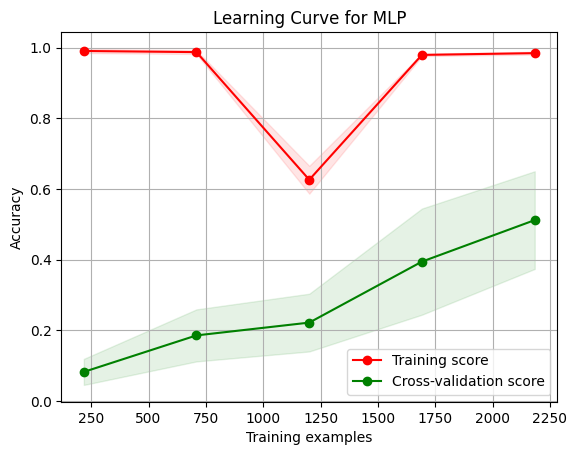

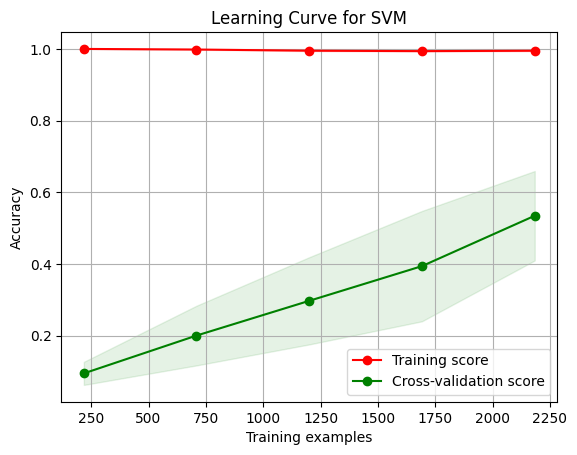

MLP chosen as the best model.

Test Set Results:
Accuracy: 0.4597
Log-loss: 4.7557
F1-score: 0.4400


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, log_loss, f1_score

# Load and preprocess the data
data = pd.read_csv('final_dataset.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create models with hyperparameters
mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,), alpha=0.0001)
)

svm = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', random_state=42, probability=True, C=1.0, gamma='scale')
)

# Define scoring metrics for cross-validation
scoring = ['accuracy', 'neg_log_loss', 'f1_weighted']

# Function to perform cross-validation
def perform_cv(model, X, y, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True)
    return scores

# Function to print cross-validation results
def print_cv_results(model_name, scores):
    print(f"{model_name} Cross-Validation Results:")
    for metric in ['accuracy', 'neg_log_loss', 'f1_weighted']:
        train_scores = scores[f'train_{metric}']
        test_scores = scores[f'test_{metric}']
        print(f"{metric.capitalize()}:")
        print(f"  Training: {train_scores.mean():.4f} (+/- {train_scores.std() * 2:.4f})")
        print(f"  Validation: {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")
    print()

# Perform initial cross-validation for both models
mlp_scores = perform_cv(mlp, X_train, y_train, scoring)
svm_scores = perform_cv(svm, X_train, y_train, scoring)

# Print initial cross-validation results for both models
print("Initial Cross-Validation Results:")
print_cv_results("MLP", mlp_scores)
print_cv_results("SVM", svm_scores)

# Function to perform grid search for hyperparameter tuning
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

# Define parameter grids
mlp_param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__learning_rate': ['constant', 'adaptive']
}

svm_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    'svc__kernel': ['rbf', 'poly']
}

# Perform grid search
print("MLP Grid Search:")
best_mlp = perform_grid_search(mlp, mlp_param_grid, X_train, y_train)

print("\nSVM Grid Search:")
best_svm = perform_grid_search(svm, svm_param_grid, X_train, y_train)

# Perform cross-validation with the best models
best_mlp_scores = perform_cv(best_mlp, X_train, y_train, scoring)
best_svm_scores = perform_cv(best_svm, X_train, y_train, scoring)

# Print cross-validation results for the best models
print("\nCross-Validation Results after Hyperparameter Tuning:")
print_cv_results("Best MLP", best_mlp_scores)
print_cv_results("Best SVM", best_svm_scores)

# Function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for both models
plot_learning_curve(best_mlp, X, y, "Learning Curve for MLP")
plot_learning_curve(best_svm, X, y, "Learning Curve for SVM")
plt.show()

# Choose the best model based on cross-validation accuracy scores
if best_mlp_scores['test_accuracy'].mean() > best_svm_scores['test_accuracy'].mean():
    best_model = best_mlp
    print("MLP chosen as the best model.")
else:
    best_model = best_svm
    print("SVM chosen as the best model.")

# Evaluate on the test set using the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Print test set results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Log-loss: {log_loss(y_test, y_pred_proba):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

### This version adds more comprehensive evaluation metrics and visualization, including a confusion matrix and top misclassifications analysis.

### Workflow:

1. Data Preparation:

- Load and preprocess the data
- Split into training and test sets (e.g., 80% train, 20% test)
- Consider feature scaling (e.g., StandardScaler)

2. Initial Model Evaluation:

- Implement basic versions of candidate models (e.g., MLP, SVM)
- Use cross-validation (e.g., 5-fold) to get initial performance estimates
- Plot learning curves to check for overfitting/underfitting

3. Address Overfitting/Underfitting:

- If overfitting: Consider regularization, reducing model complexity, or increasing training data
- If underfitting: Consider increasing model complexity or feature engineering

4. Hyperparameter Tuning:

- Use GridSearchCV or RandomizedSearchCV for each model
- Include regularization parameters in the search space
- Use cross-validation within the search (e.g., 5-fold)

5. Model Selection:

- Compare best versions of each model type based on cross-validation scores
- Select the model with the best performance

6. Final Model Evaluation:

- Train the best model on the entire training set
- Evaluate on the held-out test set
- Calculate various metrics (accuracy, F1-score, log-loss)
- Generate confusion matrix and classification report

7. Learning Curve Analysis:

- Plot final learning curves to ensure no overfitting/underfitting

8. Error Analysis:

- Analyze top misclassifications
- Consider additional feature engineering or ensemble methods if needed



Initial MLP Evaluation:


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation Accuracy: 0.7544 (+/- 0.0246)


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic 

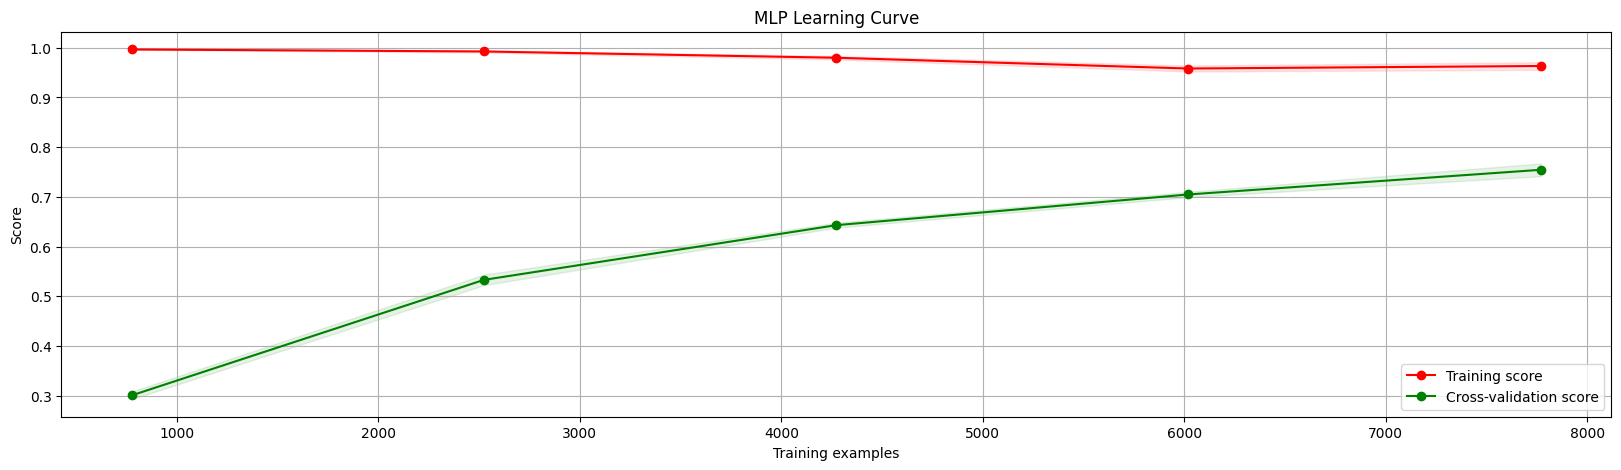


Initial SVM Evaluation:
Cross-validation Accuracy: 0.4520 (+/- 0.0186)


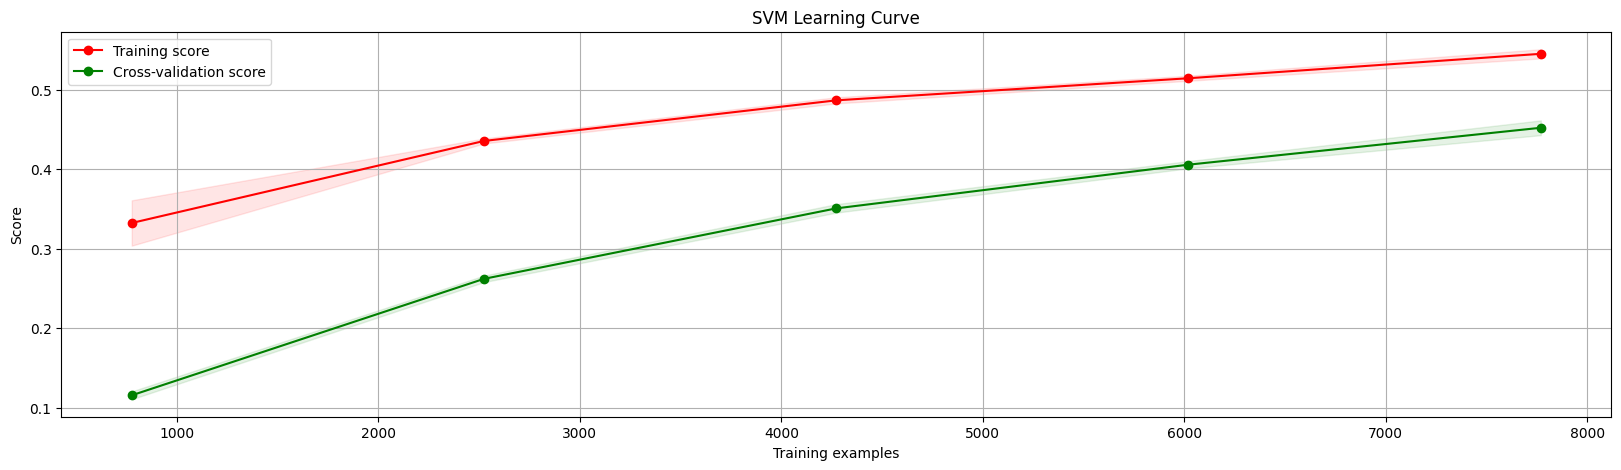


Tuning MLP:
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant'}
Best cross-validation score: 0.7544

Tuning SVM:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'poly'}
Best cross-validation score: 0.7994


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Model: SVM

Final Model Evaluation:
Test Accuracy: 0.8304
Test Log-loss: 1.4535
Test F1-score: 0.8253

Classification Report:
               precision    recall  f1-score   support

     Abundant       0.85      0.85      0.85        13
       Active       0.77      0.71      0.74        14
        Adult       1.00      0.92      0.96        13
        Agile       0.76      0.93      0.84        14
     Alluring       0.53      0.77      0.62        13
      Amiable       0.80      0.86      0.83        14
      Amusing       0.92      0.92      0.92        13
      Aqueous       0.81      1.00      0.90        13
 Aristocratic       0.88      1.00      0.93        14
     Aromatic       1.00      0.93      0.96        14
     Artistic       0.87      1.00      0.93        13
Authoritative       0.63      0.92      0.75        13
       Bitter       0.87      1.00      0.93        13
      Bitterl       1.00      1.00      1.00        13
         Bold       0.69      0.85      0.

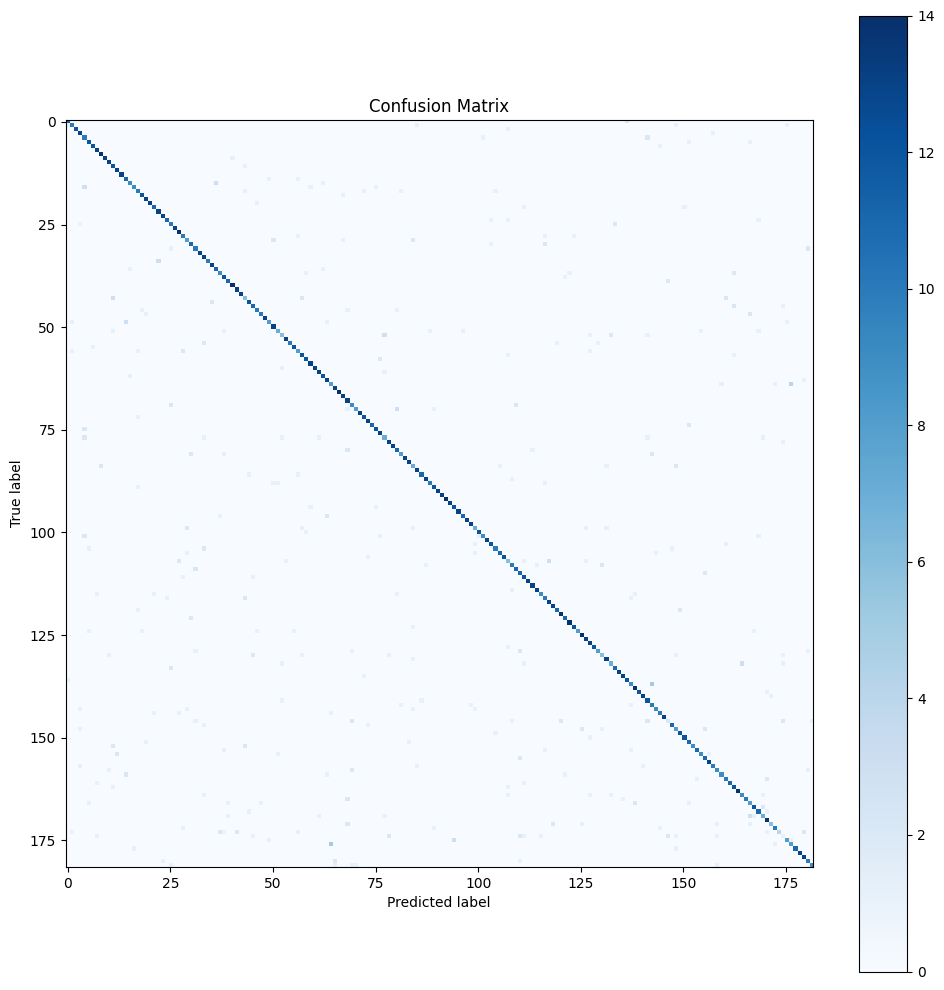

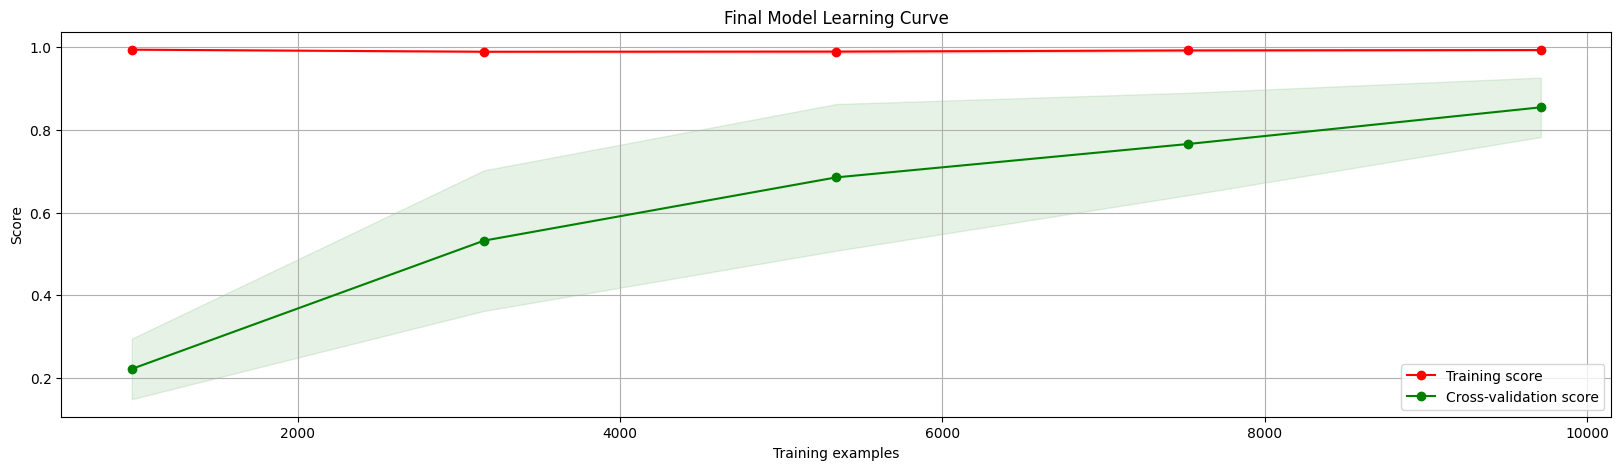


Top 10 Misclassifications:
True: Fresh, Predicted: Neat, Confidence: 0.6087
True: Dreamy, Predicted: Charming, Confidence: 0.6130
True: Healthy, Predicted: Open, Confidence: 0.6354
True: Pleasant, Predicted: Smooth, Confidence: 0.6379
True: Friendly, Predicted: Healthy, Confidence: 0.6734
True: Untamed, Predicted: Delignet, Confidence: 0.6796
True: Active, Predicted: Intense, Confidence: 0.6906
True: Untamed, Predicted: Delignet, Confidence: 0.6992
True: Dazzling, Predicted: Festive, Confidence: 0.7688
True: Festive, Predicted: Bright, Confidence: 0.7974


In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, classification_report

# 1. Data Preparation
# Load the dataset from a CSV file
data = pd.read_csv('final_dataset.csv')
# Extract features and normalize them to [0, 1] range
X = data.iloc[:, :-1].values / 255.0
# Extract the target variable (last column)
y = data.iloc[:, -1].values
# Split the data into training and test sets, stratifying to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Helper functions
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    # Create a new figure if axes is not provided
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    # Set the title of the plot
    axes.set_title(title)
    # Set y-axis limits if provided
    if ylim is not None:
        axes.set_ylim(*ylim)
    # Set x and y axis labels
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    # Compute learning curve points
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    # Compute mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    # Compute mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    # Plot shaded area representing standard deviation of training scores
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    # Plot shaded area representing standard deviation of test scores
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    # Plot mean training scores
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    # Plot mean test scores
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    # Add legend to the plot
    axes.legend(loc="best")

    return plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Get probability predictions on the test set
    y_pred_proba = model.predict_proba(X_test)
    
    # Print various performance metrics
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Test Log-loss: {log_loss(y_test, y_pred_proba):.4f}")
    print(f"Test F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 2. Initial Model Evaluation
# Define a dictionary of models to evaluate
models = {
    'MLP': Pipeline([('scaler', StandardScaler()),
                     ('mlp', MLPClassifier(max_iter=1000, random_state=42))]),
    'SVM': Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(probability=True, random_state=42))])
}

# Evaluate each model
for name, model in models.items():
    print(f"\nInitial {name} Evaluation:")
    # Perform cross-validation and get scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Print mean and standard deviation of cross-validation scores
    print(f"Cross-validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    # Plot learning curve for the model
    plot_learning_curve(model, f'{name} Learning Curve', X_train, y_train, cv=5)
    plt.show()

# 3 & 4. Address Overfitting/Underfitting and Hyperparameter Tuning
# Define parameter grids for each model
param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'mlp__alpha': [0.0001, 0.001, 0.01],
        'mlp__learning_rate': ['constant', 'adaptive'],
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__gamma': ['scale', 'auto', 0.1, 1],
        'svm__kernel': ['rbf', 'poly']
    }
}

best_models = {}

# Perform grid search for each model
for name, model in models.items():
    print(f"\nTuning {name}:")
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=1)
    # Fit grid search to find best parameters
    grid_search.fit(X_train, y_train)
    # Store best model
    best_models[name] = grid_search.best_estimator_
    # Print best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

def check_fit(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training score: {train_score:.4f}")
    print(f"Test score: {test_score:.4f}")
    if train_score - test_score > 0.1:
        print("Model might be overfitting.")
    elif test_score < 0.6:  # Adjust this threshold based on your problem
        print("Model might be underfitting.")
    else:
        print("Model seems to be fitting well.")

# Use this function after training each model
check_fit(best_model, X_train, y_train, X_test, y_test)

# 5. Model Selection
# Choose the best model based on cross-validation scores
best_model_name = max(best_models, key=lambda name: cross_val_score(best_models[name], X_train, y_train, cv=5).mean())
best_model = best_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# 6 & 7. Final Model Evaluation and Learning Curve Analysis
print("\nFinal Model Evaluation:")
# Evaluate the best model
evaluate_model(best_model, X_train, X_test, y_train, y_test)
# Plot learning curve for the best model
plot_learning_curve(best_model, 'Final Model Learning Curve', X, y, cv=5)
plt.show()

# 8. Error Analysis
# Make predictions on the test set
y_pred = best_model.predict(X_test)
# Get probability predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)

def print_top_misclassifications(y_true, y_pred, y_pred_proba, top_n=10):
    # Find indices of misclassified samples
    misclassified = y_true != y_pred
    misclassified_indices = np.where(misclassified)[0]
    # Get probabilities of misclassified samples
    misclassified_proba = y_pred_proba[misclassified_indices].max(axis=1)
    # Get indices of top misclassifications
    top_misclassified = misclassified_indices[np.argsort(misclassified_proba)[-top_n:]]
    
    print(f"\nTop {top_n} Misclassifications:")
    # Print details of top misclassifications
    for idx in top_misclassified:
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        confidence = y_pred_proba[idx].max()
        print(f"True: {true_label}, Predicted: {pred_label}, Confidence: {confidence:.4f}")

# Print top misclassifications
print_top_misclassifications(y_test, y_pred, y_pred_proba)

### Some notes from the output

- Cross-validation Accuracy: 0.4520 (+/- 0.0186) : το +/- 0.0186 δείχνει το διάστημα εμπιστοσύνης 95%. Αυτό σημαίνει ότι είμαστε 95% σίγουροι πως η πραγματική ακρίβεια του μοντέλου SVM, σε νέα δεδομένα, θα κυμαίνεται μεταξύ 43.34% και 47.06%.

- Top 10 Mis classifications : (Κορυφαίες 10 Λανθασμένες Ταξινομήσεις):
  Αυτή η λίστα δείχνει τις περιπτώσεις όπου το μοντέλο προέβλεψε λάθος την κατηγορία στην οποία ανήκει ένα αντικείμενο, παρόλο που ήταν σχετικά σίγουρο για την πρόβλεψή του. Για κάθε περίπτωση, βλέπουμε:

  - True (Πραγματική τιμή): Η πραγματική κατηγορία στην οποία ανήκει το αντικείμενο.
  - Predicted (Προβλεπόμενη τιμή): Η κατηγορία που προέβλεψε το μοντέλο.
  - Confidence (Σιγουριά): Πόσο σίγουρο ήταν το μοντέλο για την πρόβλεψή του (σε κλίμακα από 0 έως 1).

  Πολλά από τα λάθη γίνονται μεταξύ κατηγοριών που έχουν παρόμοια σημασία (π.χ., "Fresh" και "Neat", "Dreamy" και "Charming").
  Το μοντέλο είναι αρκετά σίγουρο για τις προβλέψεις του, ακόμα και όταν αυτές είναι λάθος.
  Κάποια ζευγάρια κατηγοριών εμφανίζονται πολλές φορές (π.χ., "Untamed" προβλέπεται ως "Delignet" δύο φορές), υποδεικνύοντας μια συστηματική σύγχυση μεταξύ τους.

  Αυτά τα λάθη αναδεικνύουν τις δυσκολίες αυτού του προβλήματος ταξινόμησης. Πολλές από τις κατηγορίες είναι εννοιολογικά παρόμοιες, γεγονός που εξηγεί γιατί το μοντέλο δυσκολεύεται να τις διακρίνει.

- Confusion Matrix

  - Η διαγώνιος είναι έντονα μπλε: Αυτό σημαίνει ότι το μοντέλο κάνει πολύ καλές προβλέψεις για πολλές περιπτώσεις. Όταν η πραγματική κατηγορία και η προβλεπόμενη συμπίπτουν, έχουμε ένα σωστό αποτέλεσμα, και αυτό φαίνεται με το έντονο μπλε χρώμα στη διαγώνιο.
  - Υπάρχουν ελάχιστα ανοιχτόχρωμα σημεία εκτός διαγωνίου: Αυτό σημαίνει ότι το μοντέλο κάνει πολύ λίγα λάθη. Τα ανοιχτόχρωμα σημεία εκτός διαγωνίου αντιπροσωπεύουν τις περιπτώσεις όπου το μοντέλο μπερδεύει μια κατηγορία με μια άλλη.


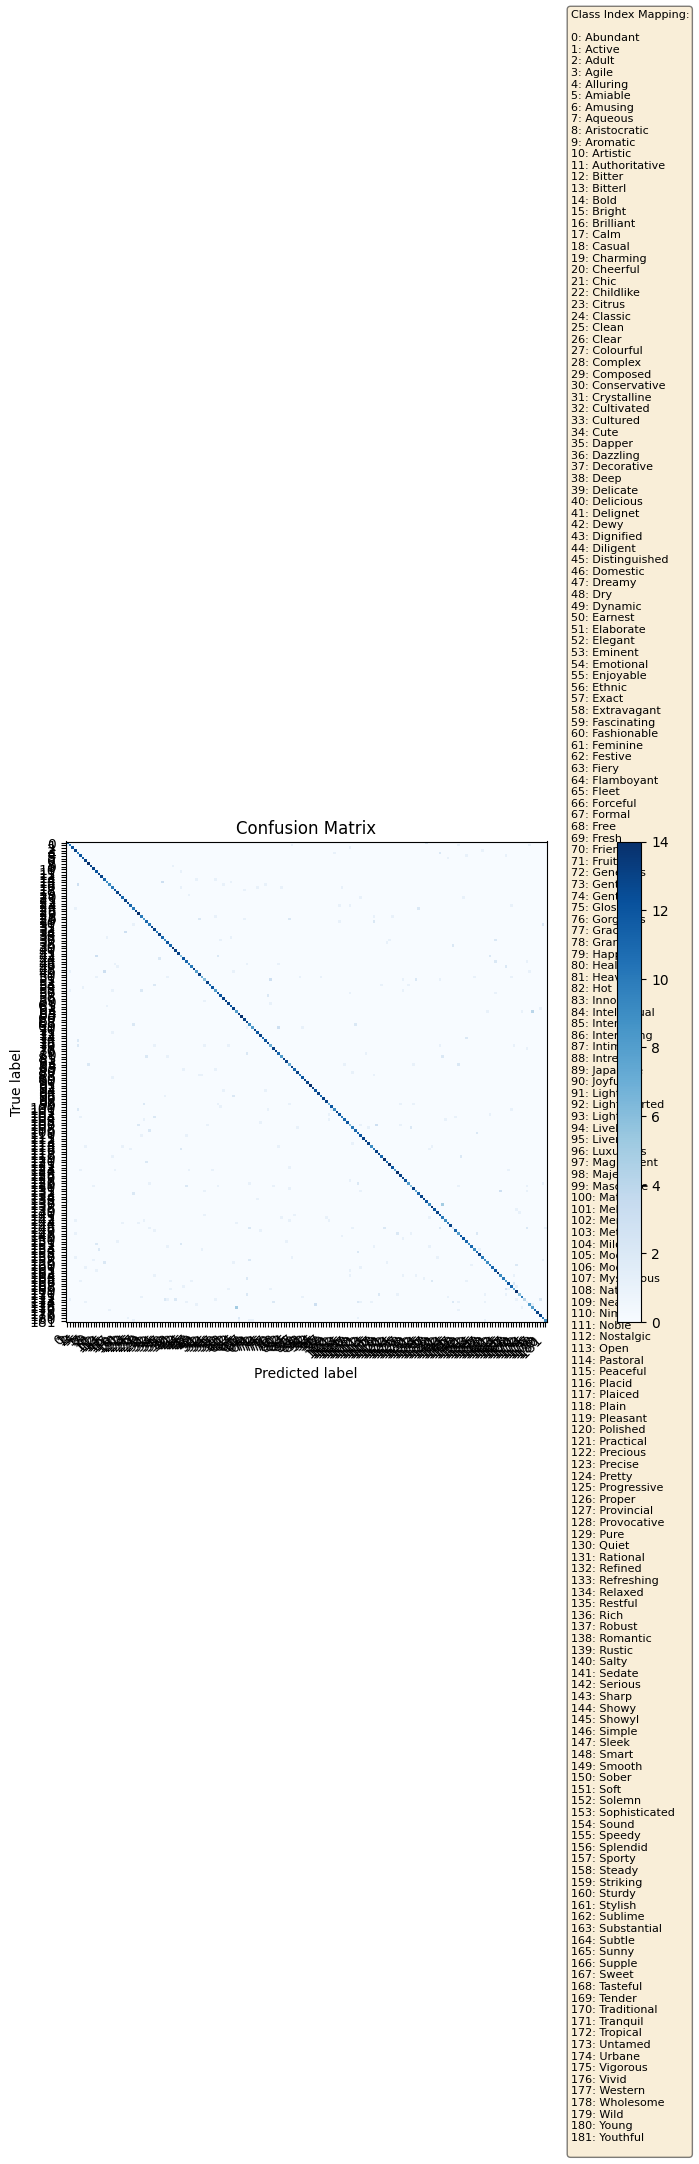

Class Index Mapping:
0: Abundant
1: Active
2: Adult
3: Agile
4: Alluring
5: Amiable
6: Amusing
7: Aqueous
8: Aristocratic
9: Aromatic
10: Artistic
11: Authoritative
12: Bitter
13: Bitterl
14: Bold
15: Bright
16: Brilliant
17: Calm
18: Casual
19: Charming
20: Cheerful
21: Chic
22: Childlike
23: Citrus
24: Classic
25: Clean
26: Clear
27: Colourful
28: Complex
29: Composed
30: Conservative
31: Crystalline
32: Cultivated
33: Cultured
34: Cute
35: Dapper
36: Dazzling
37: Decorative
38: Deep
39: Delicate
40: Delicious
41: Delignet
42: Dewy
43: Dignified
44: Diligent
45: Distinguished
46: Domestic
47: Dreamy
48: Dry
49: Dynamic
50: Earnest
51: Elaborate
52: Elegant
53: Eminent
54: Emotional
55: Enjoyable
56: Ethnic
57: Exact
58: Extravagant
59: Fascinating
60: Fashionable
61: Feminine
62: Festive
63: Fiery
64: Flamboyant
65: Fleet
66: Forceful
67: Formal
68: Free
69: Fresh
70: Friendly
71: Fruitful
72: Generous
73: Genteed
74: Gentle
75: Glossy
76: Gorgeous
77: Graceful
78: Grand
79: Happy
80

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create a mapping of index to class label
label_map = {i: label for i, label in enumerate(unique_labels)}

plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Set x and y axis ticks
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, range(len(unique_labels)), rotation=45, ha='right')
plt.yticks(tick_marks, range(len(unique_labels)))

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add gridlines to make it easier to read
plt.grid(False)

# Add a text box explaining the legend
legend_text = "Class Index Mapping:\n\n"
for idx, label in label_map.items():
    legend_text += f"{idx}: {label}\n"

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.05, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=8,
         verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

# Print the label mapping for reference
print("Class Index Mapping:")
for idx, label in label_map.items():
    print(f"{idx}: {label}")

### Use nested cross-validation approach !


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, classification_report

# 1. Data Preparation
data = pd.read_csv('final_dataset.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Helper functions
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Test Log-loss: {log_loss(y_test, y_pred_proba):.4f}")
    print(f"Test F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def nested_cv(X, y, model, param_grid, outer_cv=5, inner_cv=3):
    outer_scores = []
    
    outer_cv = KFold(n_splits=outer_cv, shuffle=True, random_state=42)
    
    for train_idx, test_idx in outer_cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        grid_search = GridSearchCV(model, param_grid, cv=inner_cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        score = best_model.score(X_test, y_test)
        outer_scores.append(score)
    
    return np.mean(outer_scores), np.std(outer_scores)

# 2. Model Definition
models = {
    'MLP': Pipeline([('scaler', StandardScaler()),
                     ('mlp', MLPClassifier(max_iter=1000, random_state=42))]),
    'SVM': Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(probability=True, random_state=42))])
}

# 3. Hyperparameter Grids
param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'mlp__alpha': [0.0001, 0.001, 0.01],
        'mlp__learning_rate': ['constant', 'adaptive'],
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__gamma': ['scale', 'auto', 0.1, 1],
        'svm__kernel': ['rbf', 'poly']
    }
}

# 4. Nested Cross-Validation
print("Performing Nested Cross-Validation:")
for name, model in models.items():
    mean_score, std_score = nested_cv(X, y, model, param_grids[name])
    print(f"{name} - Mean score: {mean_score:.4f} (+/- {std_score * 2:.4f})")

# 5. Final Model Training and Evaluation
# Split the data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

best_models = {}
for name, model in models.items():
    print(f"\nFinal {name} Model:")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    print("\nFinal Model Evaluation:")
    evaluate_model(best_models[name], X_train, X_test, y_train, y_test)
    plot_learning_curve(best_models[name], f'Final {name} Learning Curve', X, y, cv=5)
    plt.show()

# 6. Error Analysis
def print_top_misclassifications(y_true, y_pred, y_pred_proba, top_n=10):
    misclassified = y_true != y_pred
    misclassified_indices = np.where(misclassified)[0]
    misclassified_proba = y_pred_proba[misclassified_indices].max(axis=1)
    top_misclassified = misclassified_indices[np.argsort(misclassified_proba)[-top_n:]]
    
    print(f"\nTop {top_n} Misclassifications:")
    for idx in top_misclassified:
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        confidence = y_pred_proba[idx].max()
        print(f"True: {true_label}, Predicted: {pred_label}, Confidence: {confidence:.4f}")

for name, model in best_models.items():
    print(f"\nError Analysis for {name}:")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print_top_misclassifications(y_test, y_pred, y_pred_proba)